# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [1]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import numpy as np

## Dataset


In [3]:
# DO NOT MODIFY
loan_data = pd.read_csv("../data/loan_approval.csv")
loan_data.head()

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected

In [4]:
print(loan_data['education'].unique())
print(loan_data['self_employed'].unique())
print(loan_data['cibil_score'].max())
print(loan_data['cibil_score'].min())
print(loan_data['loan_status'].unique())

['Graduate' 'Not Graduate']
['No' 'Yes']
900
300
['Approved' 'Rejected']


## EDA
Uncomment to see desired output. Add more analysis if you like

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    

([<matplotlib.axis.YTick at 0x7ff7452e6ac0>,
 [Text(0, 0, 'loan_id'),
  Text(0, 1, 'no_of_dependents'),
  Text(0, 2, 'income_annum'),
  Text(0, 3, 'loan_amount'),
  Text(0, 4, 'loan_term'),
  Text(0, 5, 'cibil_score'),
  Text(0, 6, 'residential_assets_value'),
  Text(0, 7, 'commercial_assets_value'),
  Text(0, 8, 'luxury_assets_value'),
  Text(0, 9, 'bank_asset_value')])

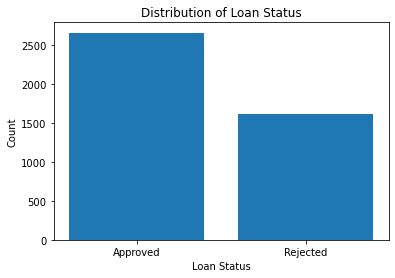

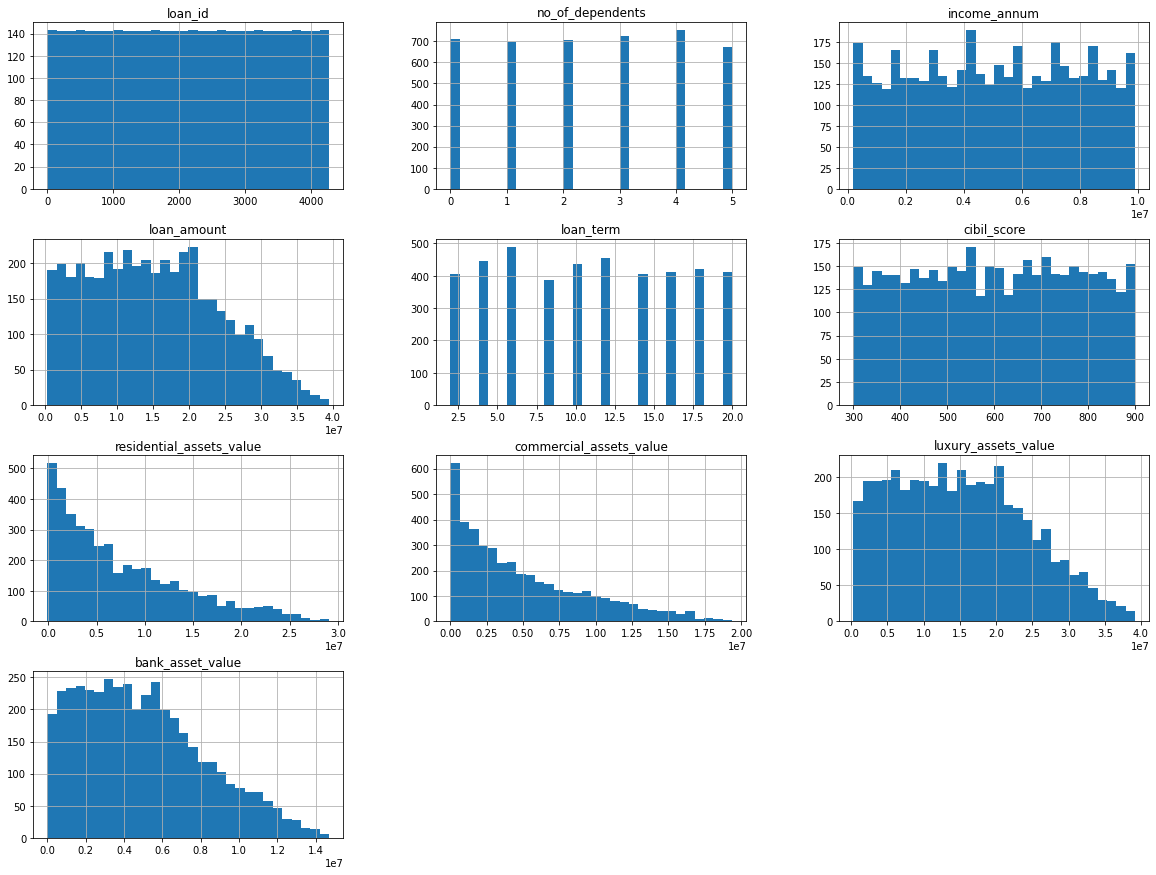

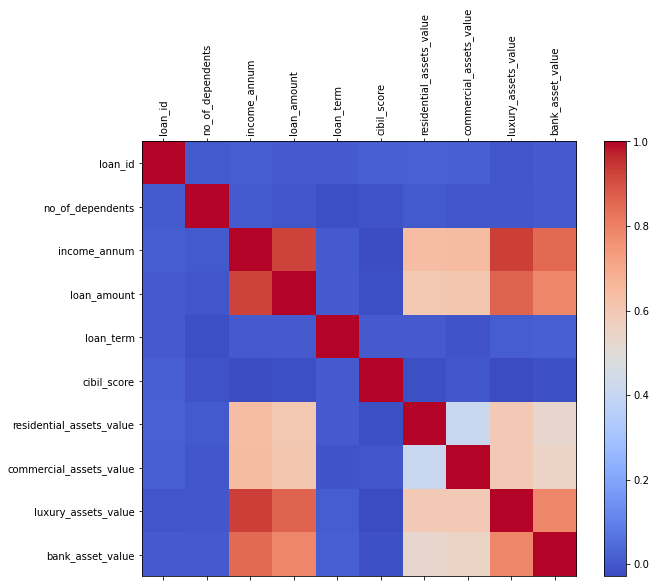

In [106]:

import matplotlib.pyplot as plt

# ------ Display basic information ------
print(loan_data.columns)
print(loan_data.describe())

# ------ Check for missing values ------
print(loan_data.isnull().sum())

# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))

# ------ Correlation matrix ------
corr_matrix = loan_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# ----- MORE (Encouraged but not required) ------
# TODO 

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [379]:
loan_data = pd.read_csv("../../data/loan_approval.csv")
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
# Hint: Other categorical variables are self_employed and loan_status
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved':1,'Rejected':0})
loan_data['total_asset'] = loan_data['residential_assets_value'] + loan_data['commercial_assets_value'] + loan_data['luxury_assets_value']  + loan_data['bank_asset_value']
loan_data
df = loan_data[['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term','cibil_score','loan_status','total_asset','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']]

# Calculate the total asset value to reduce the number of feature
# scaled the big values down
# claculate the z-score for the columns income_annum/bank_asset_value 
df['bank_asset_value_scaled'] = (df['bank_asset_value']-df['bank_asset_value'].mean()).div(df['bank_asset_value'].std())
df['income_annum_scaled'] = (df['income_annum']- df['income_annum'].mean()).div(df['income_annum'].std())
df['loan_amount_scaled'] = (df['loan_amount'] - df['loan_amount'].mean()).div(df['loan_amount'].std())
df['total_asset_scaled'] = (df['total_asset'] - df['total_asset'].mean()).div(df['total_asset'].std())
df['residential_assets_value_scaled'] = (df['residential_assets_value'] - df['residential_assets_value'].mean()).div(df['residential_assets_value'].std())
df['luxury_assets_value_scaled'] = (df['luxury_assets_value'] - df['luxury_assets_value'].mean()).div(df['luxury_assets_value'].std())
df['commercial_assets_value_scaled'] = (df['commercial_assets_value'] - df['commercial_assets_value'].mean()).div(df['commercial_assets_value'].std())
df

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          1              0       9600000     29900000   
1                    0          0              1       4100000     12200000   
2                    3          1              0       9100000     29700000   
3                    3          1              0       8200000     30700000   
4                    5          0              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          1              1       1000000      2300000   
4265                 0          0              1       3300000     11300000   
4266                 2          0              0       6500000     23900000   
4267                 1          0              0       4100000     12800000   
4268                 1          1              0       9200000     29700000   

      loan_term  cibil_score  loan_status  total_asset  \
0            12          778            1     50700000   
1             8          417            0     17000000   
2            20          506            0     57700000   
3             8          467            0     52700000   
4            20          382            0     55000000   
...         ...          ...          ...          ...   
4264         12          317            0      7400000   
4265         20          559            1     20000000   
4266         18          457            0     39000000   
4267          8          780            1     28800000   
4268         10          607            1     77300000   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2                      7100000                  4500000             33300000   
3                     18200000                  3300000             23300000   
4                     12400000                  8200000             29400000   
...                        ...                      ...                  ...   
4264                   2800000                   500000              3300000   
4265                   4200000                  2900000             11000000   
4266                   1200000                 12400000             18100000   
4267                   8200000                   700000             14100000   
4268                  17800000                 11800000             35700000   

      bank_asset_value  bank_asset_value_scaled  income_annum_scaled  \
0              8000000                 0.930195             1.617790   
1              3300000                -0.515876            -0.341710   
2             12800000                 2.407034             1.439653   
3              7900000                 0.899428             1.119008   
4              5000000                 0.007171             1.689044   
...                ...                      ...                  ...   
4264            800000                -1.285063            -1.446154   
4265           1900000                -0.946621            -0.626728   
4266           7300000                 0.714823             0.513345   
4267           5800000                 0.253311            -0.341710   
4268          12000000                 2.160895             1.475281   

      loan_amount_scaled  total_asset_scaled  residential_assets_value_scaled  \
0               1.632860            0.930519                        -0.779966   
1              -0.324376           -0.797105                        -0.733838   
2               1.610745            1.289373                        -0.057294   
3               1.721323            1.033049                         1.649444   
4               1.002564            1.150958                         0.757635   
...                  ...                 ...    

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [383]:
from sklearn.model_selection import train_test_split

X = df[['income_annum_scaled','loan_amount_scaled','loan_term','cibil_score','total_asset_scaled']].dropna()
y = df.loc[X.index]['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.2, random_state=0)

## Model Training and Evaluation

In [413]:
# education/no_of_Dependent/self_employed do not have much impact on the outcome \
# cibil score/bank_asset_value/income has high impact on the loan approval
# logistic regression classifier

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#print(model.intercept_)
#print(model.coef_)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(np.mean(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5   #0.9227166276346604 0.9215456674473068 0.9215456674473068

Accuracy 0.9215456674473068
Precision: 0.9351145038167938
Recall: 0.9369024856596558
0.00117096018735363


0.28009700561179374

In [412]:
# k neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
# 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred =  knn.predict(X_test)

print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(np.mean(knn.predict(X_test)-y_test))
np.mean((knn.predict(X_test)-y_test)**2)**0.5  
#for i in range(1,100):
 #   knn = KNeighborsClassifier(n_neighbors=i)
  #  knn.fit(X_train,y_train)
   # y_pred =  knn.predict(X_test)
    #print(metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9578454332552693
Precision: 0.9585687382297552
Recall: 0.9732313575525813
0.00936768149882904


0.20531577324874647

In [410]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(np.mean(rfc.predict(X_test)-y_test))
np.mean((rfc.predict(X_test)-y_test)**2)**0.5  

Accuracy 0.9847775175644028
Precision: 0.9829545454545454
Recall: 0.9923518164435946
0.00585480093676815


0.12337942468498217

In [409]:
#support vector machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(np.mean(svm.predict(X_test)-y_test))
np.mean((svm.predict(X_test)-y_test)**2)**0.5  

Accuracy 0.9355971896955504
Precision: 0.95703125
Recall: 0.9369024856596558
-0.01288056206088993


0.2537770878240383

## Model Optimization and Testing

array([1, 1, 1, ..., 1, 1, 1])

# Random forest classifier able to best predict the outcome with following matrics
```Accuracy ```  =   0.9847775175644028

```Precision``` = 0.9829545454545454

```Recall   ``` = 0.9923518164435946

